In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk.corpus
from nltk.stem.snowball import SnowballStemmer
from sklearn.cross_validation import train_test_split
from ml_metrics import rmsle
import xgboost as xgb
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets, linear_model, preprocessing
import scipy.sparse as sps
from scipy.sparse import coo_matrix, hstack, vstack, csr_matrix
from scipy import io
from datetime import datetime
import gc
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
townstate = pd.read_csv("../input/town_state.csv", encoding='utf-8')

In [14]:
townstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 3 columns):
Agencia_ID    790 non-null int64
Town          790 non-null object
State         790 non-null object
dtypes: int64(1), object(2)
memory usage: 18.6+ KB


In [15]:
townstate['Town_ID']=townstate['Town'].str[:4]
#df['state'].str[:2]

In [24]:
townstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 5 columns):
Agencia_ID    790 non-null int64
Town          790 non-null object
State         790 non-null object
Town_ID       790 non-null object
State_ID      790 non-null int64
dtypes: int64(2), object(3)
memory usage: 30.9+ KB


In [25]:
townstate.head()

,Agencia_ID,Town,State,Town_ID,State_ID
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F.",2008,16
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",2002,16
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO,2004,9
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F.",2008,16
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F.",2029,16


In [18]:
import collections
from collections import Counter

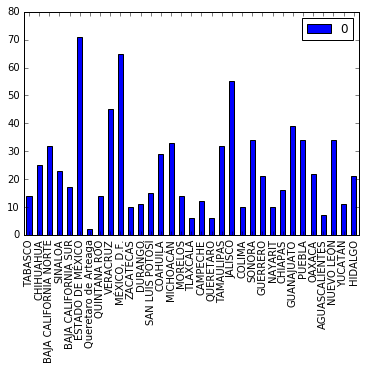

In [19]:
states = townstate['State']
shortname_counter = Counter(states)

df = pd.DataFrame.from_dict(shortname_counter, orient='index')
df.plot(kind='bar')

In [23]:
le = preprocessing.LabelEncoder()

townstate['State_ID']=le.fit_transform(states)

list(le.classes_)

#le.transform(["tokyo", "tokyo", "paris"]) 

list(le.inverse_transform([2, 22, 1]))

[u'BAJA CALIFORNIA SUR', u'QUINTANA ROO', u'BAJA CALIFORNIA NORTE']

In [6]:
shortname_counter

Counter({u'AGUASCALIENTES': 7,
         u'BAJA CALIFORNIA NORTE': 32,
         u'BAJA CALIFORNIA SUR': 17,
         u'CAMPECHE': 12,
         u'CHIAPAS': 16,
         u'CHIHUAHUA': 25,
         u'COAHUILA': 29,
         u'COLIMA': 10,
         u'DURANGO': 11,
         u'ESTADO DE M\xc9XICO': 71,
         u'GUANAJUATO': 39,
         u'GUERRERO': 21,
         u'HIDALGO': 21,
         u'JALISCO': 55,
         u'MICHOAC\xc1N': 33,
         u'MORELOS': 14,
         u'M\xc9XICO, D.F.': 65,
         u'NAYARIT': 10,
         u'NUEVO LE\xd3N': 34,
         u'OAXACA': 22,
         u'PUEBLA': 34,
         u'QUERETARO': 6,
         u'QUINTANA ROO': 14,
         u'Queretaro de Arteaga': 2,
         u'SAN LUIS POTOS\xcd': 15,
         u'SINALOA': 23,
         u'SONORA': 34,
         u'TABASCO': 14,
         u'TAMAULIPAS': 32,
         u'TLAXCALA': 6,
         u'VERACRUZ': 45,
         u'YUCAT\xc1N': 11,
         u'ZACATECAS': 10})

In [27]:
townstate = townstate.drop(['Town', 'State'], axis=1)

In [38]:
townstate.describe()

,Agencia_ID,Town_ID,State_ID
count,790.000000,790.000000,790.000000
mean,8531.505063,2296.905063,15.443038
std,9908.708738,176.136001,8.667125
min,1110.000000,2001.000000,0.000000
25%,1513.500000,2161.000000,9.000000
50%,2063.500000,2309.000000,14.000000
75%,21616.500000,2417.000000,22.000000
max,25769.000000,3216.000000,32.000000


In [40]:
townstate = townstate.astype('uint16')
townstate[['State_ID']] =townstate[['State_ID']] .astype('uint8')


In [41]:
townstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 3 columns):
Agencia_ID    790 non-null uint16
Town_ID       790 non-null uint16
State_ID      790 non-null uint8
dtypes: uint16(2), uint8(1)
memory usage: 3.9 KB


In [42]:
townstate.to_csv('../input/town_state_ID.csv')